<a href="https://colab.research.google.com/github/CyberBantu/IndicesPluviometricoRJ2022/blob/main/RJ_indice_pluviometrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('dados_completos.csv', sep= ';')
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T00:50:00Z,"0,00"
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:00:00Z,"0,39"
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:10:00Z,"0,39"
3,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:20:00Z,"1,77"
4,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:30:00Z,"2,75"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218781 entries, 0 to 218780
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   municipio    218781 non-null  object
 1   codEstacao   218781 non-null  object
 2   uf           218781 non-null  object
 3   nomeEstacao  218781 non-null  object
 4   latitude     218781 non-null  object
 5   longitude    218781 non-null  object
 6   datahora     218781 non-null  object
 7   valorMedida  218781 non-null  object
dtypes: object(8)
memory usage: 13.4+ MB


In [ ]:
df['datahora'] = df['datahora'].str.split('T').str[0]

In [ ]:
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,00"
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,39"
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,39"
3,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"1,77"
4,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"2,75"


In [ ]:
df['datahora'] = pd.to_datetime(df['datahora'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218781 entries, 0 to 218780
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   municipio    218781 non-null  object        
 1   codEstacao   218781 non-null  object        
 2   uf           218781 non-null  object        
 3   nomeEstacao  218781 non-null  object        
 4   latitude     218781 non-null  object        
 5   longitude    218781 non-null  object        
 6   datahora     218781 non-null  datetime64[ns]
 7   valorMedida  218781 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 13.4+ MB


#### Criando agrupamento dos dados por Estação

In [ ]:
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,00"
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,39"
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,39"
3,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"1,77"
4,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"2,75"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218781 entries, 0 to 218780
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   municipio    218781 non-null  object        
 1   codEstacao   218781 non-null  object        
 2   uf           218781 non-null  object        
 3   nomeEstacao  218781 non-null  object        
 4   latitude     218781 non-null  object        
 5   longitude    218781 non-null  object        
 6   datahora     218781 non-null  datetime64[ns]
 7   valorMedida  218781 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 13.4+ MB


In [ ]:
# Tratando os dados
# O valor estava como texto e com . ou inves de , 
df["valorMedida"] = df["valorMedida"].str.replace(",", ".")
# Tranformar em numerico toda a coluna
df["valorMedida"] = pd.to_numeric(df["valorMedida"])
# Fazendo o agrupamento
estacao = df.groupby("nomeEstacao")["valorMedida"].sum()

In [ ]:
estacao = estacao.reset_index()
estacao 

,nomeEstacao,valorMedida
0,Abolição,902.20
1,Alto da Boa Vista,2658.60
2,Andaraí,932.00
3,CIEP Dr. João Ramos de Souza,1263.20
4,CIEP Samuel Wainer,1097.20
5,Catete,493.80
6,Defesa Civil Santa Cruz,1438.20
7,Glória,766.08
8,Higienópolis,1254.40
9,Ilha de Paquetá,1363.60


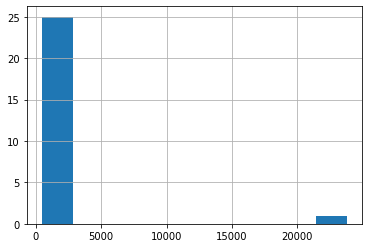

In [ ]:
estacao.hist()
plt.show()

* Foi observados valores outliers

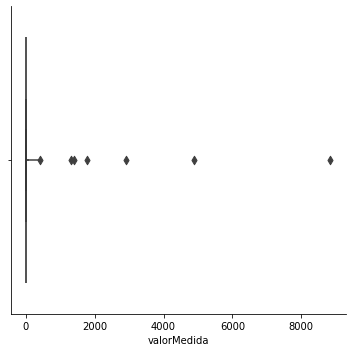

In [ ]:
sns.catplot(data = estacao, x = 'valorMedida' ,kind = 'boxen')

In [ ]:
# Calcular a média e o desvio padrão
media = estacao['valorMedida'].mean()
dp = estacao['valorMedida'].std()
print(media, dp)

2078.9853846153846 4448.319383797194


In [ ]:
# Definir o limite inferior e superior
inf = media - 3 * dp
sup = media + 3 * dp
print(inf, sup)

-11265.972766776198 15423.943536006966


In [ ]:
estacao = estacao[(estacao['valorMedida'] > inf) & (estacao['valorMedida'] < sup)]
estacao

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,0.00
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,0.39
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,0.39
3,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,1.77
4,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,2.75
...,...,...,...,...,...,...,...,...
218776,RIO DE JANEIRO,330455734A,RJ,Ilha de Paquetá,"-22,761300","-43,108400",2022-09-30,0.00
218777,RIO DE JANEIRO,330455734A,RJ,Ilha de Paquetá,"-22,761300","-43,108400",2022-09-30,0.00
218778,RIO DE JANEIRO,330455734A,RJ,Ilha de Paquetá,"-22,761300","-43,108400",2022-09-30,0.00
218779,RIO DE JANEIRO,330455734A,RJ,Ilha de Paquetá,"-22,761300","-43,108400",2022-09-30,0.00


In [ ]:
estacao.describe()

,valorMedida
count,218781.000000
mean,0.247067
std,23.230750
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8848.520000
